In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [3]:
# Load dataset
file_path = "C:/Users/Samuel Raj/Downloads/eeg-headset.csv"
eye_df = pd.read_csv(file_path)
eye_df

AF3       F7       F3      FC5       T7        P       O1       O2  \
0      4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
1      4324.62  4004.62  4293.85  4148.72  4342.05  4586.67  4097.44  4638.97   
2      4327.69  4006.67  4295.38  4156.41  4336.92  4583.59  4096.92  4630.26   
3      4328.72  4011.79  4296.41  4155.90  4343.59  4582.56  4097.44  4630.77   
4      4326.15  4011.79  4292.31  4151.28  4347.69  4586.67  4095.90  4627.69   
...        ...      ...      ...      ...      ...      ...      ...      ...   
14975  4281.03  3990.26  4245.64  4116.92  4333.85  4614.36  4074.87  4625.64   
14976  4276.92  3991.79  4245.13  4110.77  4332.82  4615.38  4073.33  4621.54   
14977  4277.44  3990.77  4246.67  4113.85  4333.33  4615.38  4072.82  4623.59   
14978  4284.62  3991.79  4251.28  4122.05  4334.36  4616.41  4080.51  4628.72   
14979  4287.69  3997.44  4260.00  4121.03  4333.33  4616.41  4088.72  4638.46   

            P8       T8      FC6       F4       F8      AF4  eye_state  
0      4222.05  4238.46  4211.28  4280.51  4635.90  4393.85          1  
1      4210.77  4226.67  4207.69  4279.49  4632.82  4384.10          1  
2      4207.69  4222.05  4206.67  4282.05  4628.72  4389.23          1  
3      4217.44  4235.38  4210.77  4287.69  4632.31  4396.41          1  
4      4210.77  4244.10  4212.82  4288.21  4632.82  4398.46          1  
...        ...      ...      ...      ...      ...      ...        ...  
14975  4203.08  4221.54  4171.28  4269.23  4593.33  4340.51          2  
14976  4194.36  4217.44  4162.56  4259.49  4590.26  4333.33          2  
14977  4193.33  4212.82  4160.51  4257.95  4591.79  4339.49          2  
14978  4200.00  4220.00  4165.64  4267.18  4596.41  4350.77          2  
14979  4212.31  4226.67  4167.69  4274.36  4597.95  4350.77          2  

[14980 rows x 15 columns]

In [4]:
eye_df.isna().sum()

AF3          0
F7           0
F3           0
FC5          0
T7           0
P            0
O1           0
O2           0
P8           0
T8           0
FC6          0
F4           0
F8           0
AF4          0
eye_state    0
dtype: int64

In [ ]:
eye_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AF3        14980 non-null  float64
 1   F7         14980 non-null  float64
 2   F3         14980 non-null  float64
 3   FC5        14980 non-null  float64
 4   T7         14980 non-null  float64
 5   P          14980 non-null  float64
 6   O1         14980 non-null  float64
 7   O2         14980 non-null  float64
 8   P8         14980 non-null  float64
 9   T8         14980 non-null  float64
 10  FC6        14980 non-null  float64
 11  F4         14980 non-null  float64
 12  F8         14980 non-null  float64
 13  AF4        14980 non-null  float64
 14  eye_state  14980 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 1.7 MB


In [ ]:
eye_df.describe()

AF3            F7            F3            FC5            T7  \
count   14980.000000  14980.000000  14980.000000   14980.000000  14980.000000   
mean     4321.917777   4009.767694   4264.022433    4164.946326   4341.741075   
std      2492.072174     45.941672     44.428052    5216.404632     34.738821   
min      1030.770000   2830.770000   1040.000000    2453.330000   2089.740000   
25%      4280.510000   3990.770000   4250.260000    4108.210000   4331.790000   
50%      4294.360000   4005.640000   4262.560000    4120.510000   4338.970000   
75%      4311.790000   4023.080000   4270.770000    4132.310000   4347.180000   
max    309231.000000   7804.620000   6880.510000  642564.000000   6474.360000   

                   P             O1            O2             P8  \
count   14980.000000   14980.000000  14980.000000   14980.000000   
mean     4644.022379    4110.400160   4616.056904    4218.826610   
std      2924.789537    4600.926543     29.292603    2136.408523   
min      2768.210000    2086.150000   4567.180000    1357.950000   
25%      4611.790000    4057.950000   4604.620000    4190.770000   
50%      4617.950000    4070.260000   4613.330000    4199.490000   
75%      4626.670000    4083.590000   4624.100000    4209.230000   
max    362564.000000  567179.000000   7264.100000  265641.000000   

                 T8           FC6            F4             F8            AF4  \
count  14980.000000  14980.000000  14980.000000   14980.000000   14980.000000   
mean    4231.316200   4202.456900   4279.232774    4615.205336    4416.435832   
std       38.050903     37.785981     41.544312    1208.369958    5891.285043   
min     1816.410000   3273.330000   2257.950000      86.666700    1366.150000   
25%     4220.510000   4190.260000   4267.690000    4590.770000    4342.050000   
50%     4229.230000   4200.510000   4276.920000    4603.080000    4354.870000   
75%     4239.490000   4211.280000   4287.180000    4617.440000    4372.820000   
max     6674.360000   6823.080000   7002.560000  152308.000000  715897.000000   

          eye_state  
count  14980.000000  
mean       1.448798  
std        0.497388  
min        1.000000  
25%        1.000000  
50%        1.000000  
75%        2.000000  
max        2.000000

In [ ]:
eye_df.shape

(14980, 15)

In [ ]:

# Define features and target
X = eye_df.drop(columns=['eye_state'])
y = eye_df['eye_state']


In [ ]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


In [ ]:

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:",accuracy*100,"%\n")
print('Classification Report:\n', report)


Accuracy: 91.20160213618158 %

Classification Report:
               precision    recall  f1-score   support

           1       0.90      0.95      0.92      4071
           2       0.93      0.87      0.90      3419

    accuracy                           0.91      7490
   macro avg       0.91      0.91      0.91      7490
weighted avg       0.91      0.91      0.91      7490



In [ ]:
pd.DataFrame({"Predicted":y_pred,"Actual":y_test})

Predicted  Actual
4252           2       2
9808           1       1
9870           1       1
14550          1       1
7093           2       2
...          ...     ...
4137           2       2
3039           1       1
9085           1       1
13258          1       1
8402           1       2

[7490 rows x 2 columns]

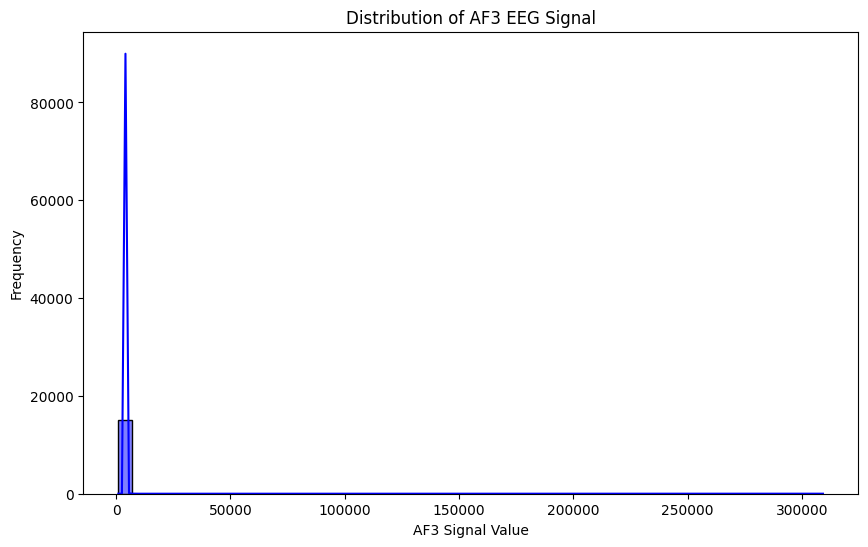

In [ ]:

#1️ Histogram of EEG Signal Distribution

plt.figure(figsize=(10, 6))
sns.histplot(eye_df['AF3'], bins=50, kde=True, color='blue')
plt.title('Distribution of AF3 EEG Signal')
plt.xlabel('AF3 Signal Value')
plt.ylabel('Frequency')
plt.show();


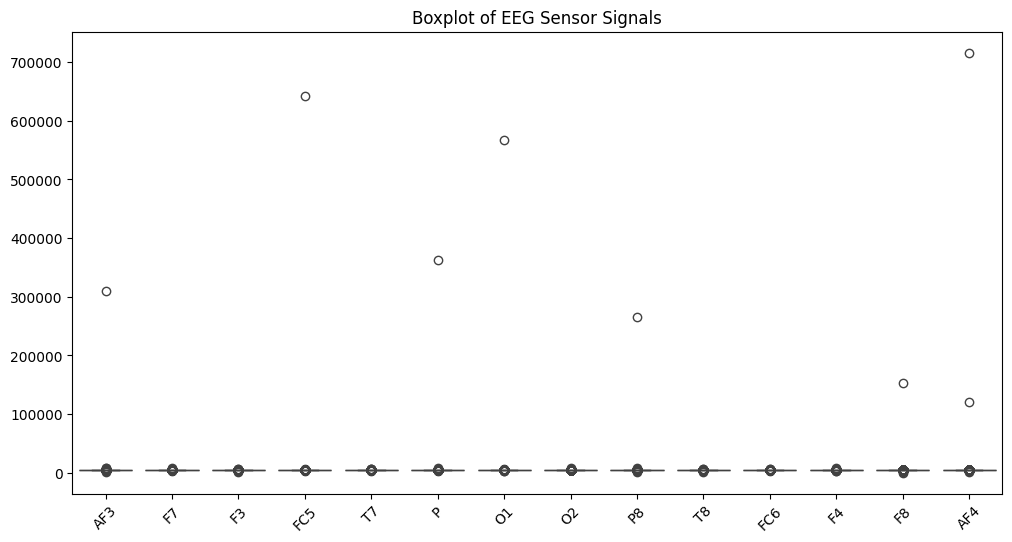

In [ ]:

#2️ Boxplot of EEG Signals

plt.figure(figsize=(12, 6))
sns.boxplot(data=eye_df.drop(columns=['eye_state']))
plt.xticks(rotation=45)
plt.title('Boxplot of EEG Sensor Signals')
plt.show();


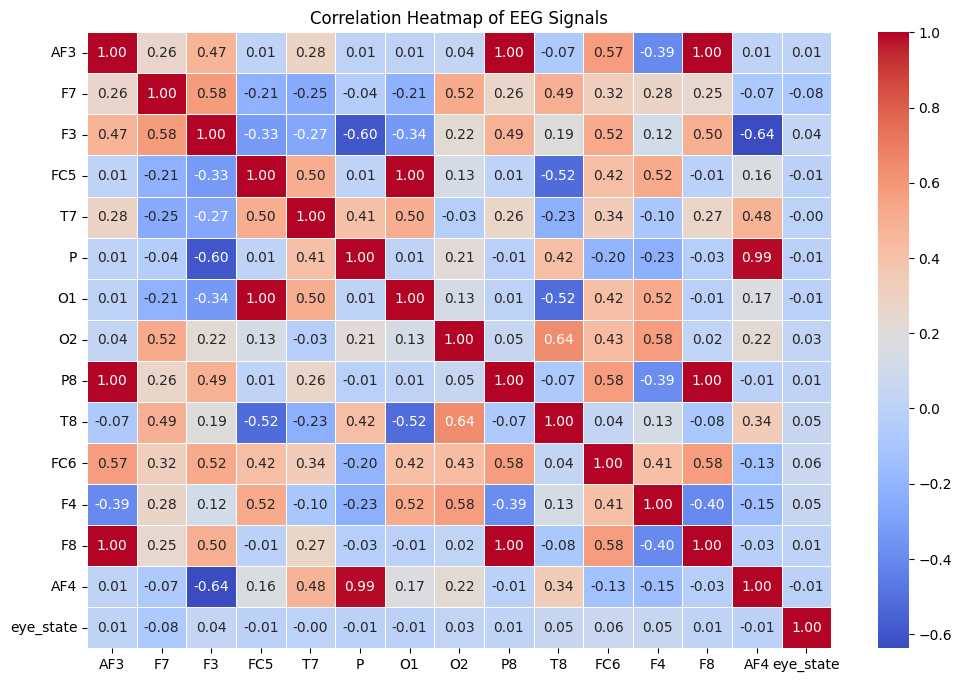

In [ ]:

#3️ Correlation Heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(eye_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of EEG Signals')
plt.show();


C:\Users\Samuel Raj\AppData\Local\Temp\ipykernel_11508\3875368841.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=eye_df['eye_state'], y=eye_df['F7'], palette='coolwarm')


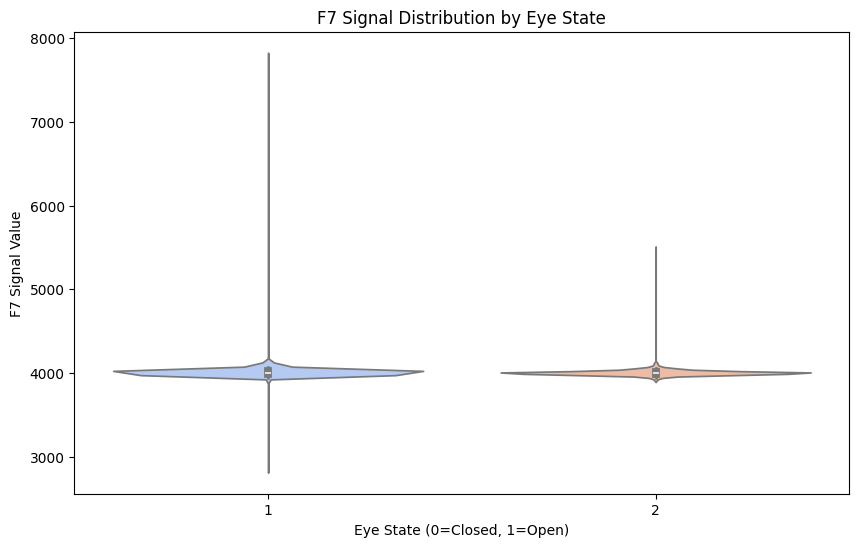

In [ ]:

#4️ Eye State vs EEG Signal Violin Plot

plt.figure(figsize=(10, 6))
sns.violinplot(x=eye_df['eye_state'], y=eye_df['F7'], palette='coolwarm')
plt.title('F7 Signal Distribution by Eye State')
plt.xlabel('Eye State (0=Closed, 1=Open)')
plt.ylabel('F7 Signal Value')
plt.show();